In [599]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
import pandas as pd
import re
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
import numpy as np
import cv2 as cv
# Loading the Boston housing dataset
# housing = fetch_openml(name="house_prices", as_frame=True)



In [600]:
split_df =  pd.read_csv('split_df.csv',encoding='utf-8-sig')

In [601]:
# split_df.drop('Name', axis=1, inplace=True)

# Create a new "ID" column with sequential numbers starting from 1
split_df['ID'] = range(1, len(split_df) + 1)

In [602]:
split_df['VA'].isnull().sum()

5

In [603]:
split_df['IOP'].isnull().sum()

3

In [604]:
split_df['CDR'].isnull().sum()

15

In [605]:
# split_df.dropna(inplace=True)
sp = split_df.drop(['Table 1','Gender','ID','Age','Spectacles','id'],axis=1)


In [606]:
sp

,Name,Eye,VA,CDR,Diagnosis,IOP
0,شاهين ميرو,0,0.6,0.5,0,14.0
1,شاهين ميرو,1,0.7,0.9,1,23.0
2,أيمن سمارة,0,NaN,NaN,1,25.0
3,أيمن سمارة,1,9.0,0.8,1,40.0
4,رندة ناصر,0,1.0,0.5,0,15.0
...,...,...,...,...,...,...
85,زريفة المحمد,1,NaN,NaN,0,NaN
86,هيثم قزاز,0,0.3,0.5,1,15.0
87,هيثم قزاز,1,0.6,0.7,1,16.0
88,حمود غشام,0,0.5,0.3,0,15.0


In [607]:
sp['Eye'].tolist()

[0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1]

In [608]:
import pandas as pd
import os

# Assuming you have loaded your schedule data into a DataFrame called 'schedule_df'
# and you have a dictionary mapping names to image filenames called 'name_to_image'

# Example schedule data (replace this with your actual data)
schedule_data = {
    'Name': ['شاهين ميرو',
 'شاهين ميرو',
 'أيمن سمارة',
 'أيمن سمارة',
 'رندة ناصر',
 'رندة ناصر',
 'مصطفى ملا علي',
 'مصطفى ملا علي',
 'نهلة أبو قورة',
 'نهلة أبو قورة',
 'لطيفة إبراهيم',
 'لطيفة إبراهيم',
 'فاطمة فرحان',
 'فاطمة فرحان',
 'صبحي الوزان ',
 'صبحي الوزان ',
 'هبة لولو',
 'هبة لولو',
 'خديجة كبة',
 'خديجة كبة',
 'عبدالرزاق بويضاني',
 'عبدالرزاق بويضاني',
 'أحمد طحان',
 'أحمد طحان',
 'حليمة شيخو',
 'حليمة شيخو',
 'علي الحسين',
 'علي الحسين',
 'محي الدين خاشوق',
 'محي الدين خاشوق',
 'دلال محمود',
 'دلال محمود',
 'نضال جريج',
 'نضال جريج',
 'فاطمة الخلف',
 'فاطمة الخلف',
 'نجاح النهار',
 'نجاح النهار',
 'مروة محجوب',
 'مروة محجوب',
 'زهير الملاح',
 'زهير الملاح',
 'باسل الباش',
 'باسل الباش',
 'نزار الحلو ',
 'نزار الحلو ',
 'ولاء حماد',
 'ولاء حماد',
 'حسين الحلقي',
 'حسين الحلقي',
 'حصة الحمد',
 'حصة الحمد',
 'ايمان الزعبي',
 'ايمان الزعبي',
 'سلفانة أبو عسلي',
 'سلفانة أبو عسلي',
 'وسام كاشي',
 'وسام كاشي',
 'صالح الهزاع',
 'صالح الهزاع',
 'راما نصرالله',
 'راما نصرالله',
 'أسرار صنوبر',
 'أسرار صنوبر',
 'حنان الابراهيم',
 'حنان الابراهيم',
 'عبدالله الغزولي ',
 'عبدالله الغزولي ',
 'نور عبدالله ',
 'نور عبدالله ',
 'جميلة عبيد',
 'جميلة عبيد',
 'عبدالرحيم حماد',
 'عبدالرحيم حماد',
 'جانيت ضاهر',
 'جانيت ضاهر',
 'فاطمة عوض',
 'فاطمة عوض',
 'حسن القاموع',
 'حسن القاموع',
 'محمد هلال',
 'محمد هلال',
 'عنود الحميد',
 'عنود الحميد',
 'زريفة المحمد',
 'زريفة المحمد',
 'هيثم قزاز',
 'هيثم قزاز',
 'حمود غشام',
 'حمود غشام'],'Eye':[0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1]
    
}
schedule_df = pd.DataFrame(schedule_data)

# Example directory containing images
image_dir = "Data/"

# Example function to load image data
def load_image(filename):
    with open(os.path.join(image_dir, filename), "rb") as f:
        # return f.read()
        return f'{image_dir}{filename}'

# Example dictionary mapping names to image filenames
# You need to populate this dictionary with your actual filenames
name_to_image = {
    ('شاهين ميرو', 0): 'SHAHEN_MERO Optic nerve_left.png',
    ('شاهين ميرو', 1): 'SHAHEN_MERO Optic nerve_right.png',
    ('أيمن سمارة', 0): 'ayman_samara_left.png',
    ('أيمن سمارة', 1): 'ayman_samara_right.png',
    ('رندة ناصر', 0): 'randa_nasser_left.png',
    ('رندة ناصر', 1): 'randa_nasser_right.png',
    ('مصطفى ملا علي', 0): 'mustafa_mulla_ali_left.png',
    ('مصطفى ملا علي', 1): 'mustafa_mulla_ali_right.png',
    ('نهلة أبو قورة', 0): 'nahla_abu_qura_left.png',
    ('نهلة أبو قورة', 1): 'nahla_abu_qura_right.png',
    ('لطيفة إبراهيم', 0): 'latifa_ibrahim_left.png',
    ('لطيفة إبراهيم', 1): 'latifa_ibrahim_right.png',
    ('فاطمة فرحان', 0): 'fatima_farhan_left.png',
    ('فاطمة فرحان', 1): 'fatima_farhan_right.png',
    ('صبحي الوزان', 0): 'subhi_alwazan_left.png',
    ('صبحي الوزان', 1): 'subhi_alwazan_right.png',
    ('هبة لولو', 0): 'hiba_lulu_left.png',
    ('هبة لولو', 1): 'hiba_lulu_right.png',
    ('خديجة كبة', 0): 'khadija_kabba_left.png',
    ('خديجة كبة', 1): 'khadija_kabba_right.png',
    ('عبدالرزاق بويضاني', 0): 'abdulrazaq_bouidan_left.png',
    ('عبدالرزاق بويضاني', 1): 'abdulrazaq_bouidan_right.png',
    ('أحمد طحان', 0): 'ahmad_taha_left.png',
    ('أحمد طحان', 1): 'ahmad_taha_right.png',
    ('حليمة شيخو', 0): 'halima_sheikho_left.png',
    ('حليمة شيخو', 1): 'halima_sheikho_right.png',
    ('علي الحسين', 0): 'ali_alhussein_left.png',
    ('علي الحسين', 1): 'ali_alhussein_right.png',
    ('محي الدين خاشوق', 0): 'muhieddin_khashoq_left.png',
    ('محي الدين خاشوق', 1): 'muhieddin_khashoq_right.png',
    ('دلال محمود', 0): 'dial_mahmoud_left.png',
    ('دلال محمود', 1): 'dial_mahmoud_right.png',
    ('نضال جريج', 0): 'nidal_greg_left.png',
    ('نضال جريج', 1): 'nidal_greg_right.png',
    ('فاطمة الخلف', 0): 'fatima_al_khalaf_left.png',
    ('فاطمة الخلف', 1): 'fatima_al_khalaf_right.png',
    ('نجاح النهار', 0): 'najah_alnahar_left.png',
    ('نجاح النهار', 1): 'najah_alnahar_right.png',
    ('مروة محجوب', 0): 'marwa_mahjoub_left.png',
    ('مروة محجوب', 1): 'marwa_mahjoub_right.png',
    ('زهير الملاح', 0): 'zuhair_almallah_left.png',
    ('زهير الملاح', 1): 'zuhair_almallah_right.png',
    ('باسل الباش', 0): 'basel_albash_left.png',
    ('باسل الباش', 1): 'basel_albash_right.png',
    ('نزار الحلو ', 0): 'nizar_alhalo_left.png',
    ('نزار الحلو ', 1): 'nizar_alhalo_right.png',
    ('ولاء حماد', 0): 'wala_hammad_left.png',
    ('ولاء حماد', 1): 'wala_hammad_right.png',
    ('حسين الحلقي', 0): 'hussein_alhalqi_left.png',
    ('حسين الحلقي', 1): 'hussein_alhalqi_right.png',
    ('حصة الحمد', 0): 'hessa_alhamad_left.png',
    ('حصة الحمد', 1): 'hessa_alhamad_right.png',
    ('ايمان الزعبي', 0): 'iman_alzoubi_left.png',
    ('ايمان الزعبي', 1): 'iman_alzoubi_right.png',
    ('سلفانة أبو عسلي', 0): 'salwana_abuasli_left.png',
    ('سلفانة أبو عسلي', 1): 'salwana_abuasli_right.png',
    ('وسام كاشي', 0): 'wissam_kashi_left.png',
    ('وسام كاشي', 1): 'wissam_kashi_right.png',
    ('صالح الهزاع', 0): 'saleh_alhazaa_left.png',
    ('صالح الهزاع', 1): 'saleh_alhazaa_right.png',
    ('راما نصرالله', 0): 'rama_nasrallah_left.png',
    ('راما نصرالله', 1): 'rama_nasrallah_right.png',
    ('أسرار صنوبر', 0): 'asarar_sanobar_left.png',
    ('أسرار صنوبر', 1): 'asarar_sanobar_right.png',
    ('حنان الابراهيم', 0): 'hanan_alibrahim_left.png',
    ('حنان الابراهيم', 1): 'hanan_alibrahim_right.png',
    ('عبدالله الغزولي ', 0): 'abdullah_alghazouli_left.png',
    ('عبدالله الغزولي ', 1): 'abdullah_alghazouli_right.png',
    ('نور عبدالله ', 0): 'nour_abdullah_left.png',
    ('نور عبدالله ', 1): 'nour_abdullah_right.png',
    ('جميلة عبيد', 0): 'jameela_obeid_left.png',
    ('جميلة عبيد', 1): 'jameela_obeid_right.png',
    ('عبدالرحيم حماد', 0): 'abdelrahim_hamad_left.png',
    ('عبدالرحيم حماد', 1): 'abdelrahim_hamad_right.png',
    ('جانيت ضاهر', 0): 'janet_daher_left.png',
    ('جانيت ضاهر', 1): 'janet_daher_right.png',
    ('فاطمة عوض', 0): 'fatima_awad_left.png',
    ('فاطمة عوض', 1): 'fatima_awad_right.png',
    ('حسن القاموع', 0): 'hassan_alqamoua_left.png',
    ('حسن القاموع', 1): 'hassan_alqamoua_right.png',
    ('محمد هلال', 0): 'mohammed_hilal_left.png',
    ('محمد هلال', 1): 'mohammed_hilal_right.png',
    ('عنود الحميد', 0): 'anoud_alhamid_left.png',
    ('عنود الحميد', 1): 'anoud_alhamid_right.png',
    ('زريفة المحمد', 0): 'zareefa_almohammad_left.png',
    ('زريفة المحمد', 1): 'zareefa_almohammad_right.png',
    ('هيثم قزاز', 0): 'haitham_qazaz_left.png',
    ('هيثم قزاز', 1): 'haitham_qazaz_right.png',
    ('حمود غشام', 0): 'hamoud_ghassan_left.png',
    ('حمود غشام', 1): 'hamoud_ghassan_right.png',
}

# Function to get the image data based on the name
def get_image_data(name):
    filename = name_to_image.get(name ,None)
    if filename:
        return load_image(filename)
    else:
        return None

# Add a new column 'Image' to the DataFrame and fill it with image data
schedule_df['Image'] = schedule_df.apply(lambda row: get_image_data((row['Name'], row['Eye'])), axis=1)

# Display the DataFrame with image data
schedule_df.head()


,Name,Eye,Image
0,شاهين ميرو,0,Data/SHAHEN_MERO_2 Optic nerve.png_ left.png
1,شاهين ميرو,1,None
2,أيمن سمارة,0,None
3,أيمن سمارة,1,None
4,رندة ناصر,0,None


Data/SHAHEN_MERO_2 Optic nerve.png_ left.png


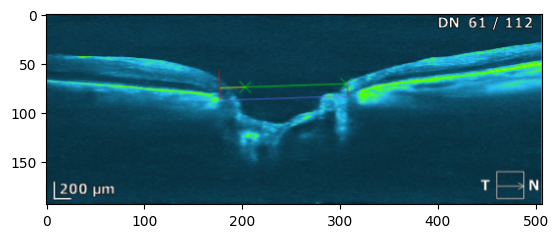

In [628]:
t = schedule_df[schedule_df['Name'] == 'شاهين ميرو']
tt = t.head(1)['Image'].tolist()[0]
print(tt)
image = cv.imread(tt)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

In [ ]:
# sp = pd.DataFrame(sp)
# new_sp = sp[(sp['Name'] == 'شاهين ميرو') & (sp['Eye'] == 0)].copy()

# new_sp['image'] = 'shahin'
# # new_sp.loc[:, 'image'] = 'shahin'

# new_sp


In [ ]:
sp = sp.drop(['Name','Eye'],axis=1)

In [ ]:
sp.dropna(inplace=True)


In [ ]:
y_data = sp['Diagnosis']
X_data = sp.drop('Diagnosis',axis=1)

In [ ]:
X_data

,VA,CDR,IOP
0,0.6,0.5,14.0
1,0.7,0.9,23.0
3,9.0,0.8,40.0
4,1.0,0.5,15.0
5,1.0,0.4,14.0
...,...,...,...
84,0.2,0.8,10.0
86,0.3,0.5,15.0
87,0.6,0.7,16.0
88,0.5,0.3,15.0


In [ ]:
# X_data.dropna(inplace=True)


In [ ]:
X_data

,VA,CDR,IOP
0,0.6,0.5,14.0
1,0.7,0.9,23.0
3,9.0,0.8,40.0
4,1.0,0.5,15.0
5,1.0,0.4,14.0
...,...,...,...
84,0.2,0.8,10.0
86,0.3,0.5,15.0
87,0.6,0.7,16.0
88,0.5,0.3,15.0


In [ ]:
y_data.head()

0    0
1    1
3    1
4    0
5    0
Name: Diagnosis, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, random_state=44, shuffle=True)


In [ ]:
# imputer = SimpleImputer(strategy='mean')
# X_train_imputed = imputer.fit_transform(X_train)
# X_test_imputed = imputer.transform(X_test)
pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    # SelectKBest(f_classif, k=3),  # Select the top 5 features based on ANOVA F-value
    BaggingClassifier(
        KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto', p=2),  # p=2 for Euclidean distance (L2)
        n_estimators=10,  # Number of base estimators in the ensemble
        random_state=42
    )
)

"""
بالتأكيد! دعونا نفسر كل جزء من خط الأنابيب:

1. **SimpleImputer**: هذه الخطوة تتعامل مع القيم المفقودة في مجموعة البيانات. هنا، نستخدم استراتيجية الوسيط البسيطة، التي تقوم بتعويض القيم المفقودة بالمتوسط ​​من القيم غير المفقودة في نفس العمود.

2. **StandardScaler**: تقوم هذه الخطوة بتوحيد الميزات عن طريق إزالة المتوسط ​​والتوحيد إلى الانحراف المعياري الواحد. يضمن التوحيد أن جميع الميزات لديها نفس المقياس، مما يمكن أن يحسن أداء بعض خوارزميات التعلم الآلي، مثل KNN.

3. **SelectKBest**: تقوم هذه الخطوة بتحديد الميزات. تختار أفضل k ميزات استنادًا إلى قيمة F-value لتحليل الانحدار الثنائي، وهو مقياس للتبعية الخطية بين الميزة والمتغير المستهدف. في هذه الحالة، نختار أفضل 4 ميزات.

4. **BaggingClassifier**: تنفذ هذه الخطوة تجميع البيانات، وهو خوارزمية تعلم تعمل على تحسين الاستقرار ودقة خوارزميات التعلم الآلي. تعمل عن طريق تدريب عدة نماذج تصنيفية قاعدية على مجموعات فرعية مختلفة من البيانات التدريبية ثم تجميع توقعاتها. هنا، نستخدم BaggingClassifier مع KNeighborsClassifier كمقدم خدمة قاعدية. يجمع BaggingClassifier توقعات 10 نماذج KNeighborsClassifier الأساسية (المحددة بواسطة `n_estimators`) المدربة على مجموعات فرعية مختلفة من البيانات. يساعد ذلك في تقليل التحديد الزائد وتحسين أداء التعميم للنموذج.

داخل BaggingClassifier:

- **KNeighborsClassifier**: هذا هو المقدم الأساسي المستخدم للتصنيف. ينفذ خوارزمية الجير الأقرب للجير للتصنيف، حيث يتم تحديد علامة الفئة لعينة غير مرئية بواسطة الفئة الأكثرية بين k أقرب جير لها. هنا، نستخدم `n_neighbors=3` (3 أقرب جير)، `weights='uniform'` (أوزان متساوية لجميع الأقرباء)، `algorithm='auto'` (اختيار تلقائي للخوارزمية)، و `p=2` (مقياس المسافة الأوروبية، والذي يتوافق مع المسافة L2).

- **n_estimators**: يحدد هذا المعلم عدد المقدمين الأساسيين (نماذج KNeighborsClassifier) التي سيتم تدريبها في التجميع.

- **random_state**: يضمن هذا المعلم تكرارية النتائج عن طريق تعيين بذرة لتوليد الأرقام العشوائية. يضمن أن نفس النتائج العشوائية للبيانات يتم استخدامها لتدريب المقدمين الأساسيين في كل تكرار من عملية التجميع.
 """



"\nبالتأكيد! دعونا نفسر كل جزء من خط الأنابيب:\n\n1. **SimpleImputer**: هذه الخطوة تتعامل مع القيم المفقودة في مجموعة البيانات. هنا، نستخدم استراتيجية الوسيط البسيطة، التي تقوم بتعويض القيم المفقودة بالمتوسط \u200b\u200bمن القيم غير المفقودة في نفس العمود.\n\n2. **StandardScaler**: تقوم هذه الخطوة بتوحيد الميزات عن طريق إزالة المتوسط \u200b\u200bوالتوحيد إلى الانحراف المعياري الواحد. يضمن التوحيد أن جميع الميزات لديها نفس المقياس، مما يمكن أن يحسن أداء بعض خوارزميات التعلم الآلي، مثل KNN.\n\n3. **SelectKBest**: تقوم هذه الخطوة بتحديد الميزات. تختار أفضل k ميزات استنادًا إلى قيمة F-value لتحليل الانحدار الثنائي، وهو مقياس للتبعية الخطية بين الميزة والمتغير المستهدف. في هذه الحالة، نختار أفضل 4 ميزات.\n\n4. **BaggingClassifier**: تنفذ هذه الخطوة تجميع البيانات، وهو خوارزمية تعلم تعمل على تحسين الاستقرار ودقة خوارزميات التعلم الآلي. تعمل عن طريق تدريب عدة نماذج تصنيفية قاعدية على مجموعات فرعية مختلفة من البيانات التدريبية ثم تجميع توقعاتها. هنا، نستخدم BaggingClassifier مع KNeighborsClass

In [ ]:
# KNNClassifierModel = KNeighborsClassifier(n_neighbors=4, weights='uniform', algorithm='auto',p=2)
# KNNClassifierModel.fit(X_train_imputed, y_train)
pipeline.fit(X_train, y_train)


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('baggingclassifier',
                 BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3),
                                   random_state=42))])

In [ ]:
print('KNeighborsClassifier Train Score is : ', pipeline.score(X_train, y_train))
print('KNeighborsClassifier Test Score is : ', pipeline.score(X_test, y_test))


KNeighborsClassifier Train Score is :  0.9047619047619048
KNeighborsClassifier Test Score is :  0.8571428571428571


In [ ]:
y_pred = pipeline.predict(X_test)
print('Predicted Value for KNeighborsClassifier is : ', y_pred[:10])

y_pred_prob = pipeline.predict_proba(X_test)


# Calculating mean absolute error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)

# Calculating mean squared error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)

# Calculating median squared error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSEValue)

print('Predicted Value for KNNClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for KNNClassifierModel is : ' , y_pred_prob[:10])

Predicted Value for KNeighborsClassifier is :  [0 0 1 1 1 0 0]
Mean Absolute Error Value is :  0.14285714285714285
Mean Squared Error Value is :  0.14285714285714285
Median Squared Error Value is :  0.0
Predicted Value for KNNClassifierModel is :  [0 0 1 1 1 0 0]
Prediction Probabilities Value for KNNClassifierModel is :  [[0.56666667 0.43333333]
 [0.7        0.3       ]
 [0.2        0.8       ]
 [0.33333333 0.66666667]
 [0.         1.        ]
 [0.8        0.2       ]
 [0.7        0.3       ]]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.67      1.00      0.80         2

    accuracy                           0.86         7
   macro avg       0.83      0.90      0.84         7
weighted avg       0.90      0.86      0.86         7

Confusion Matrix:
[[4 1]
 [0 2]]


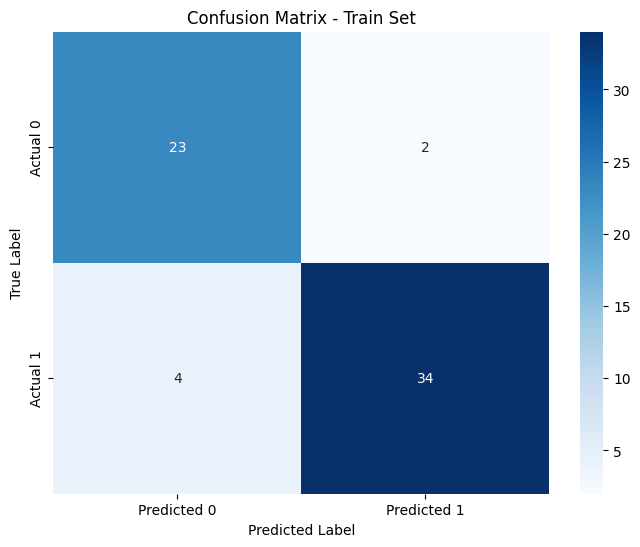

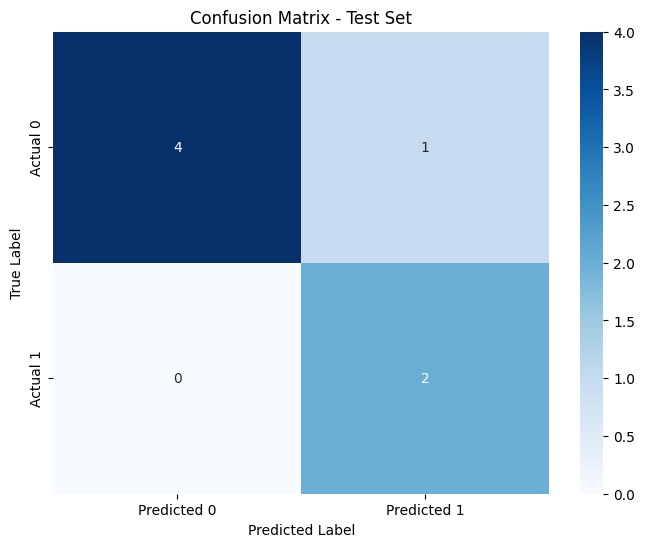

In [ ]:
# Calculate confusion matrix for train and test sets
train_predictions = pipeline.predict(X_train)
test_predictions = pipeline.predict(X_test)

train_cm = confusion_matrix(y_train, train_predictions)
test_cm = confusion_matrix(y_test, test_predictions)

# Plot confusion matrix for train set
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Train Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


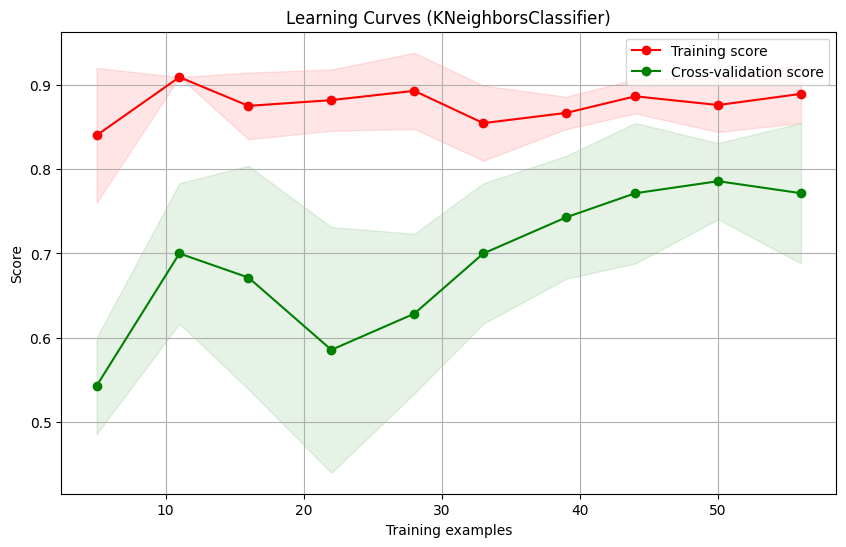

In [ ]:
# Define function to plot learning curves
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

# Plot learning curves for the model
plot_learning_curve(pipeline, X_data, y_data, "Learning Curves (KNeighborsClassifier)")
plt.show()
